In [1]:
import healpy 
import Tools
reload(Tools)  
    
energies, base = Tools.galprop2numpy(fits='/data/galprop2/output/pi0_decay_healpix_54_base_no_secondary.gz')
energies, F07 = Tools.galprop2numpy(fits='/data/galprop2/output/pi0_decay_healpix_54_F07_no_secondary.gz')
energies, NSPEB = Tools.galprop2numpy(fits='/data/galprop2/output/pi0_decay_healpix_54_NSPEB_no_secondary.gz')






In [ ]:
#energies, F07 = Tools.galprop2numpy(fits='/data/galprop2/output/pi0_decay_')

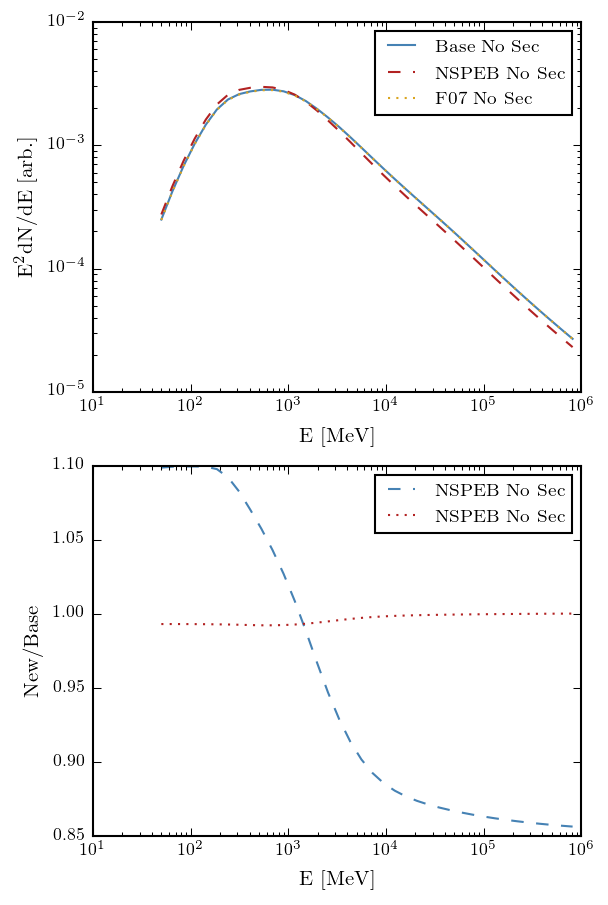

In [2]:
spec = np.array([np.mean(base[i]) for i in range(NSPEB.shape[0])])
spec2 = np.array([np.mean(NSPEB[i]) for i in range(NSPEB.shape[0])])
spec3 = np.array([np.mean(F07[i]) for i in range(NSPEB.shape[0])])
plt.figure(figsize=(4.2,7))
plt.subplot(211)

plt.loglog(energies, energies**2*spec, label='Base No Sec')
plt.loglog(energies, energies**2*spec2, label='NSPEB No Sec', ls='--')
plt.loglog(energies, energies**2*spec3, label='F07 No Sec',ls=':')

plt.legend()
plt.ylabel(r'$\rm{E^2 dN/dE}\ [arb.]$')
plt.xlabel(r'$\rm{E}\ [MeV]$')

plt.subplot(212)

plt.loglog(energies, spec2/spec, label='NSPEB No Sec', ls='--')
plt.loglog(energies, spec3/spec, label='NSPEB No Sec', ls=':')
plt.yscale('linear')
plt.legend()
plt.ylabel(r'$\rm{New/Base}$')
plt.xlabel(r'$\rm{E}\ [MeV]$')

(38, 196608)


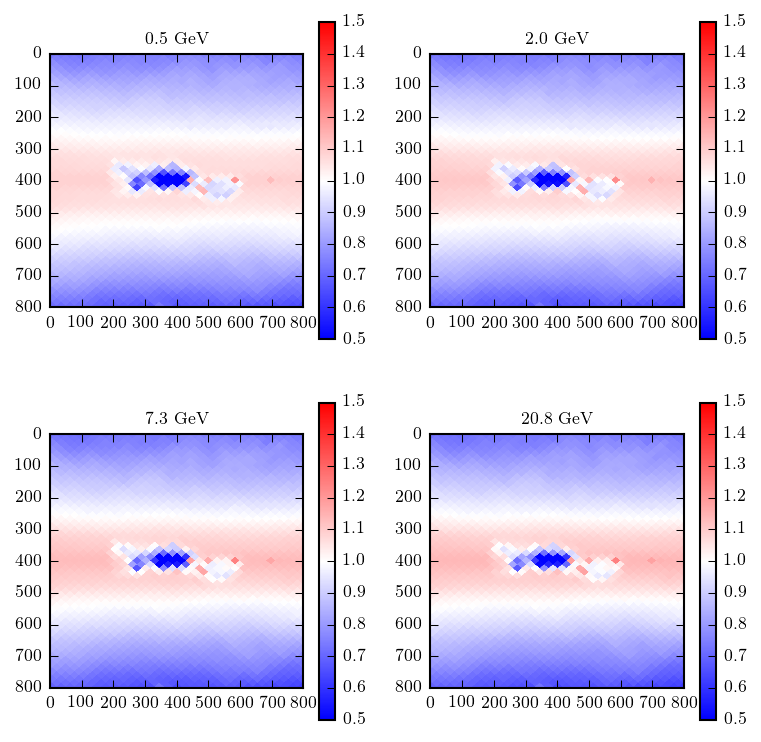

In [3]:
print base.shape
plt.figure(0, figsize=(6,6))
plt.figure(1, figsize=(6,6))
for i, i_bin in enumerate([9, 14, 19, 23]):
    plt.subplot(2,2,i+1)
    d1, d2 = base[i_bin], NSPEB[i_bin]
    d1 /= d1.mean()
    d2 /= d2.mean()
    plt.figure(0)
    cartMap = healpy.cartview((d2)/d1, hold=True, title='', return_projected_map=True, 
                              fig=0, lonra=[-10,10], latra=[-10,10])
    plt.figure(1)
    plt.imshow(cartMap, cmap='bwr', vmin=0.5,vmax=1.5)
    plt.colorbar()
    
    plt.title('%3.1f GeV' % (energies[i_bin]/1e3), fontsize=8)

    
plt.figure(0)    
plt.clf()

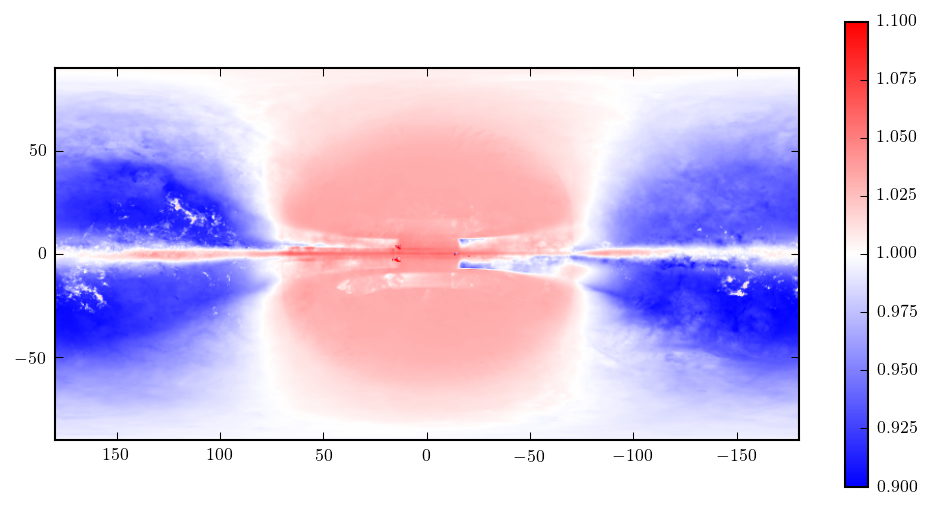

/home/carlson/ipython/IPython/kernel/__main__.py:22: RuntimeWarning: invalid value encountered in log10


<matplotlib.colorbar.Colorbar instance at 0x7f37700c8ef0>

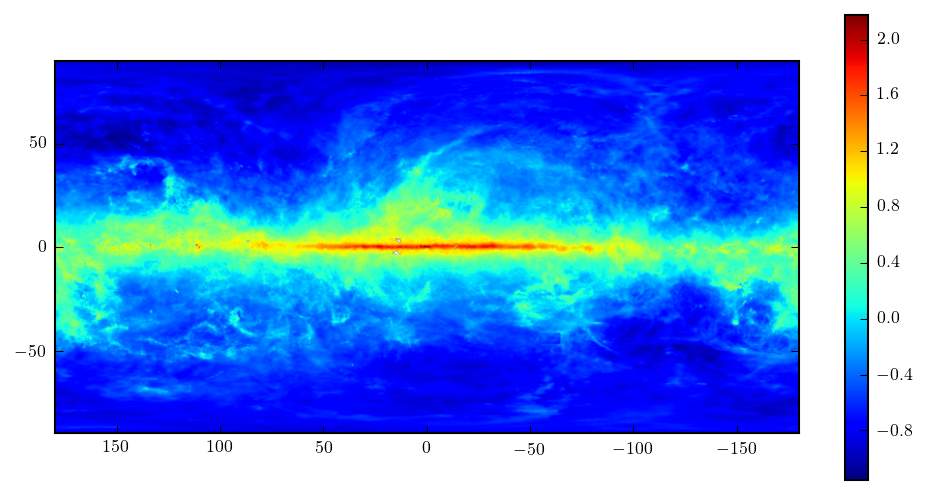

In [7]:
d1 = np.roll(pyfits.open('/data/galprop2/output/pion_decay_mapcube_54_base_no_secondary.gz')[0].data, 360, axis=2)[10]
d2 = np.roll(pyfits.open('/data/galprop2/output/pion_decay_mapcube_54_NSPEB_no_secondary.gz')[0].data, 360, axis=2)[10]

#d1 = np.roll(pyfits.open('/data/galprop2/output/pion_decay_HIR_mapcube_comp_10_54_base_no_secondary.gz')[0].data, 360, axis=2)[10]
#d2 = np.roll(pyfits.open('/data/galprop2/output/pion_decay_HIR_mapcube_comp_10_54_NSPEB_no_secondary.gz')[0].data, 360, axis=2)[10]

d1 /= np.mean(d1)
d2 /= np.mean(d2)
#plt.imshow(np.log(d1))
#plt.show()
#plt.imshow(np.log(d2))
#plt.show()
plt.figure(figsize=(8,4))
plt.imshow(d2/d1, cmap='bwr', vmin=0.90, vmax=1.1, extent=[-180,180,-90,90], origin='lower')
#plt.imshow(np.log10(d1), cmap='jet', extent=[-180,180,-90,90], origin='lower')
plt.xlim(180,-180)
plt.ylim(-90,90)
plt.colorbar()

plt.show()
plt.figure(figsize=(8,4))
plt.imshow(np.log10(d2), cmap='jet', extent=[-180,180,-90,90], origin='lower')
plt.xlim(180,-180)
plt.ylim(-90,90)
plt.colorbar()



In [97]:
#d1 = pyfits.open('/data/galprop2/output/bremss_healpix_54_NSPEB_no_secondary.gz')[1]

def ReadFits(fname):
    hdu = pyfits.open(fname)
    return np.array([hdu[1].data.field(i) for i in range(len(hdu[1].data[0]))])

#d1 = pyfits.open('/data/galprop2/output/bremss_healpix_54_base_no_secondary.gz')[1].data

import healpy
#d1 = ReadFits('/data/galprop2/output/pi0_decay_healpix_54_NSPEB_single_H2.gz')
d2 = ReadFits('/data/galprop2/output/pi0_decay_healpix_54_Pohl_HI_8500_test.gz')
b=30
m1,m2 = np.mean(d1[b]), np.mean(d2[b])


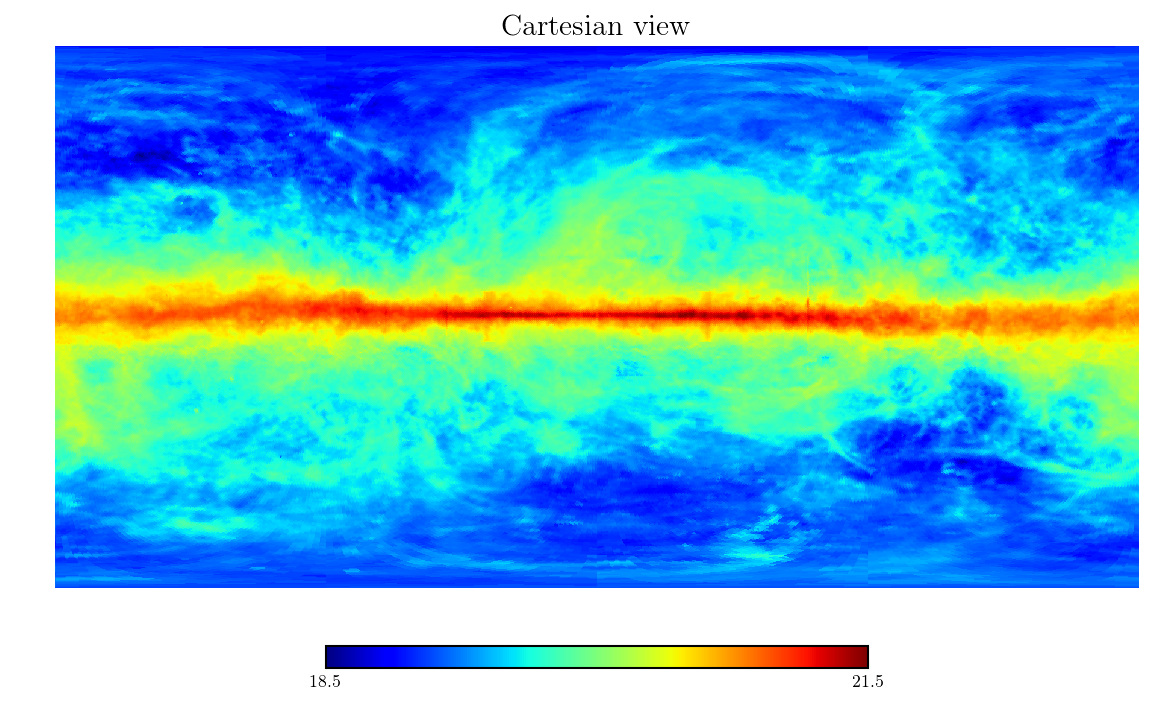

In [98]:
# print d1.shape
#m = healpy.cartview(d1[b]/d2[b], latra=(-40,40), lonra=(-40,40), return_projected_map=True, xsize=1800)
m = healpy.cartview(np.log10(d2[b]), return_projected_map=True, xsize=1800)
# plt.clf()
# plt.imshow(np.log(m), origin='lower')
# plt.colorbar()

# m = healpy.cartview(np.log10(d1[b]), latra=(-90,90), lonra=(-180,180), return_projected_map=True,xsize=1280)
# plt.clf()
# plt.imshow(m,cmap='gist_heat', origin='lower',vmin=-9., vmax=-6.5)
# plt.show()

# m = healpy.cartview(np.log10(d2[b]), latra=(-90,90), lonra=(-180,180), return_projected_map=True,xsize=1280)
# plt.clf()
# plt.imshow(m,cmap='gist_heat', origin='lower',vmin=-9., vmax=-6.5)
# #plt.colorbar()
# plt.show()


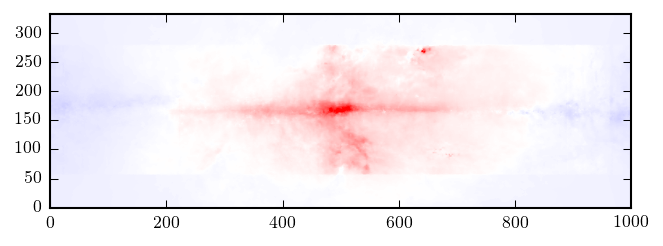

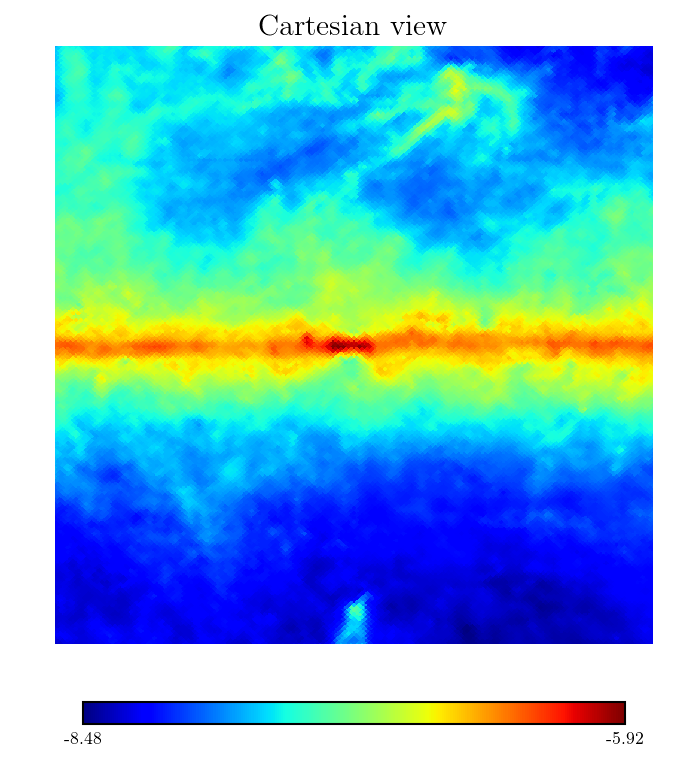

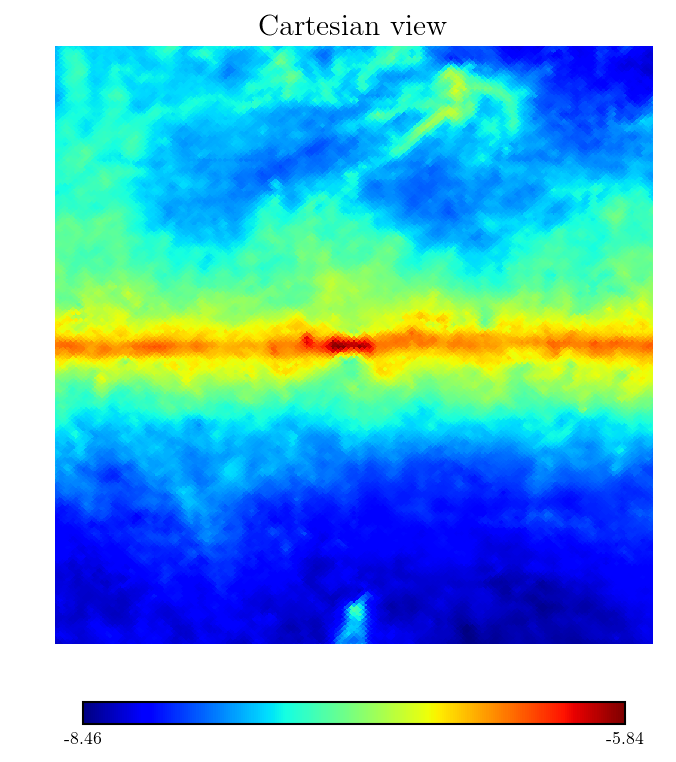

In [18]:
import h5py, healpy
f1 = h5py.File('./base.hdf5','r')
#f1 = h5py.File('Pohl_H2_8500.hdf5','r')
f1 = h5py.File('./mod_c/mod_c_69.hdf5','r')
f2 = h5py.File('./mod_c/mod_c_75.hdf5','r')


d1 = f1['templates/pi0'][10]/np.mean(f1['templates/pi0'][10])
d2 = f2['templates/pi0'][10]/np.mean(f2['templates/pi0'][10])

m = healpy.cartview(d2/d1, return_projected_map=True,
                    hold=True,xsize=1000,latra=[-30,30], lonra=[-90,90])
plt.clf()
plt.imshow(m, origin='lower', cmap='bwr', vmin=.9, vmax=1.1)
plt.show()
m = healpy.cartview(np.log10(f1['templates/pi0'][10]), return_projected_map=True, xsize=1000,
                    latra=[-20,20], lonra=[-20,20])
m = healpy.cartview(np.log10(f2['templates/pi0'][10]), return_projected_map=True, xsize=1000,
                    latra=[-20,20], lonra=[-20,20])
#plt.clf()
#plt.imshow(m,cmap='bwr', vmin=.2, vmax=1.8,origin='lower')
#plt.colorbar()


('SIMPLE', True, 'Written by IDL:  Sun Mar 22 12:11:37 2009')
('BITPIX', -32, '16-bit twos complement binary integer')
('NAXIS', 3, 'Number of axes')
('NAXIS1', 300, '/ Number pixels on axis 1')
('NAXIS2', 300, '/ Number pixels on axis 2')
('NAXIS3', 40, '/ Number pixels on axis 3')
('CTYPE1', 'x IN PC', 'axis 1 coord type')
('CRVAL1', -15.884375, '/ coord value at CRPIX1')
('CDELT1', 0.10625, '/ pixel spacing for axis 1')
('CRPIX1', 1, '/ ref pixel for axis 1')
('CTYPE2', 'y IN PC', 'axis 2 coord type')
('CRVAL2', -15.884375, '/ coord value at CRPIX2')
('CDELT2', 0.10625, '/ pixel spacing for axis 2')
('CRPIX2', 1, '/ ref pixel for axis 2')
('CTYPE3', 'z IN PC', 'axis 3 coord type')
('CRVAL3', -0.51796875, '/ coord value at CRPIX3')
('CDELT3', 0.0265625, '/ pixel spacing for axis 3')
('CRPIX3', 1, '/ ref pixel for axis 3')
('HISTORY', 'Corrected for undersampling by Ke Fang, 03/18/09', '')
('COMMENT', 'deconvolution of CFA CO data cube by MKP', '')
('COMMENT', 'value is n_h2 in molecu

/home/carlson/ipython/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


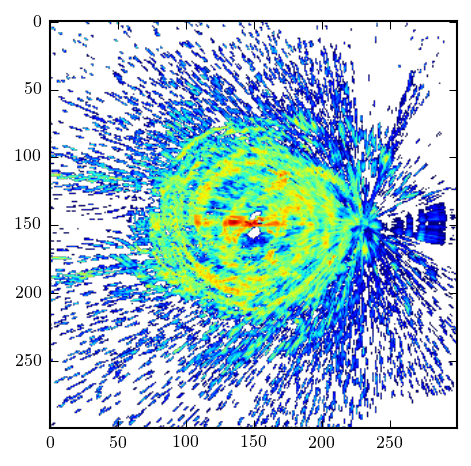

('SIMPLE', True, 'conforms to FITS standard')
('BITPIX', -32, 'array data type')
('NAXIS', 3, 'number of array dimensions')
('NAXIS1', 1201, '')
('NAXIS2', 1201, '')
('NAXIS3', 41, '')
('EXTEND', True, '')
('CTYPE1', 'x in kpc', '')
('CTYPE2', 'y in kpc', '')
('CTYPE3', 'z in kpc', '')
('CRVAL1', -15.0, '')
('CRVAL2', -15.0, '')
('CRVAL3', -0.5, '')
('CDELT1', 0.02500000000000036, '')
('CDELT2', 0.02500000000000036, '')
('CDELT3', 0.02500000000000002, '')
('COMMENT', 'Generated by Eric Carlson using maps from Martin Pohl, no', '')
('COMMENT', 'correction of artifacts due to forbidden velocities.', '')
('COMMENT', 'Units now in W_CO/cm^3.  Earth is at (8.5,0,0) kpc with -y for positive', '')
('COMMENT', 'longitudes.', '')


/home/carlson/ipython/IPython/kernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10


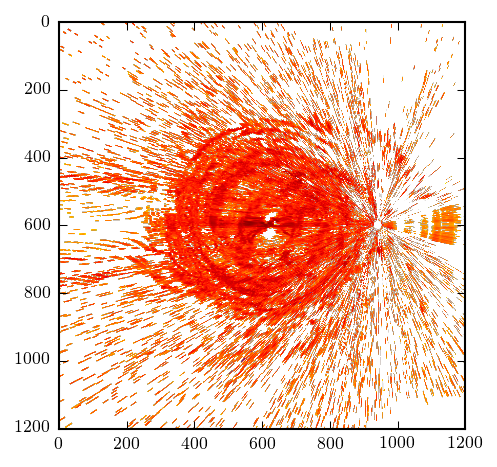

In [35]:
hdu = pyfits.open('/data/galprop2/FITS/CO_PEB_galprop_8500.fits.gz')
print hdu[0].header.cards
plt.imshow(np.log10(hdu[0].data[20]))
plt.show()

hdu = pyfits.open('/data/galprop2/FITS/CO_Pohl_galprop_8500.fits')
print hdu[0].header.cards
plt.imshow(np.log10(hdu[0].data[20]))


In [73]:
h = pyfits.open('/data/galprop2/FITS/HI_Pohl_8500_rlb.fits')
h.info()
print h[0].header.cards

Filename: /data/galprop2/FITS/HI_Pohl_8500_rlb.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      24   (380, 721, 361)   float32   
('SIMPLE', True, 'conforms to FITS standard')
('BITPIX', -32, 'array data type')
('NAXIS', 3, 'number of array dimensions')
('NAXIS1', 380, '')
('NAXIS2', 721, '')
('NAXIS3', 361, '')
('EXTEND', False, '')
('CTYPE1', 'distance', '')
('CUNIT1', 'kpc', '')
('CRVAL1', 0.05312500000000001, '')
('CRPIX1', 0, '')
('CDELT1', 0.10625, '')
('CTYPE2', 'GLON-CAR', '')
('CUNIT2', 'deg', '')
('CRVAL2', 0, '')
('CRPIX2', 0, '')
('CDELT2', 0.5, '')
('CTYPE3', 'GLAT-CAR', '')
('CUNIT3', 'deg', '')
('CRVAL3', -90.0, '')
('CRPIX3', 0, '')
('CDELT3', 0.5, '')
('CREATOR', 'Eric Carlson (erccarls@ucsc.edu)', '')
('COMMENT', 'Generated by Eric Carlson (erccarls@ucsc.edu) from Martin Pohl mapcube.', '')


In [115]:
f2 = h5py.File('Pohl_H2_8500.hdf5','r')

In [116]:
for f in f2['/templates']:
    print f
    
    
f2['/templates/pi0'][()]

brem
brem_0
energies
ics_cmb
ics_fir
ics_opt
pi0
pi0_0


array([[  8.01369460e-09,   8.20373636e-09,   8.24637159e-09, ...,
          1.19830457e-08,   1.22668125e-08,   1.22336914e-08],
       [  8.05029909e-09,   8.24121926e-09,   8.28405344e-09, ...,
          1.20380852e-08,   1.23231700e-08,   1.22898989e-08],
       [  7.63498686e-09,   7.81605980e-09,   7.85668419e-09, ...,
          1.14171099e-08,   1.16874919e-08,   1.16559375e-08],
       ..., 
       [  1.31900227e-17,   1.35111110e-17,   1.35832189e-17, ...,
          1.99028721e-17,   2.03827924e-17,   2.03271777e-17],
       [  6.54130334e-18,   6.70054636e-18,   6.73630786e-18, ...,
          9.87051298e-18,   1.01085276e-17,   1.00809453e-17],
       [  3.25243198e-18,   3.33161136e-18,   3.34939285e-18, ...,
          4.90779368e-18,   5.02614007e-18,   5.01242583e-18]], dtype=float32)

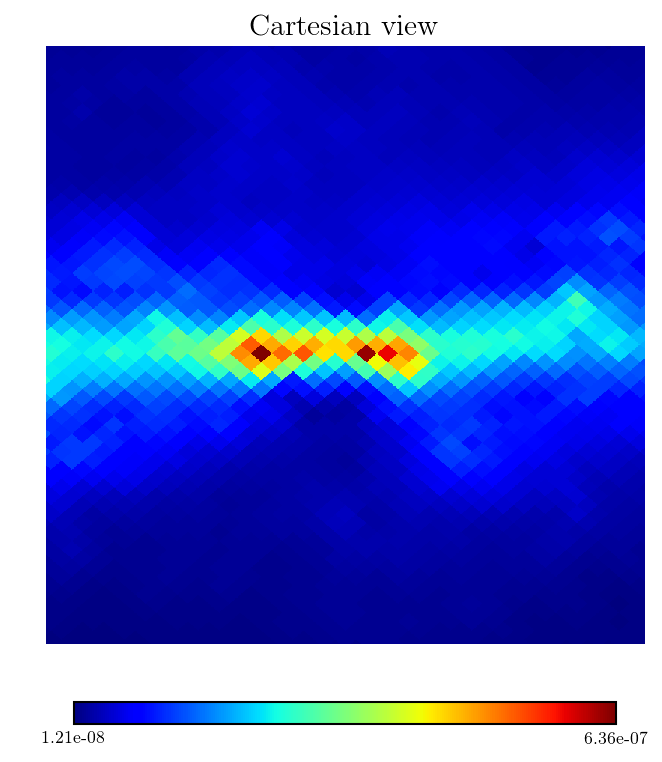

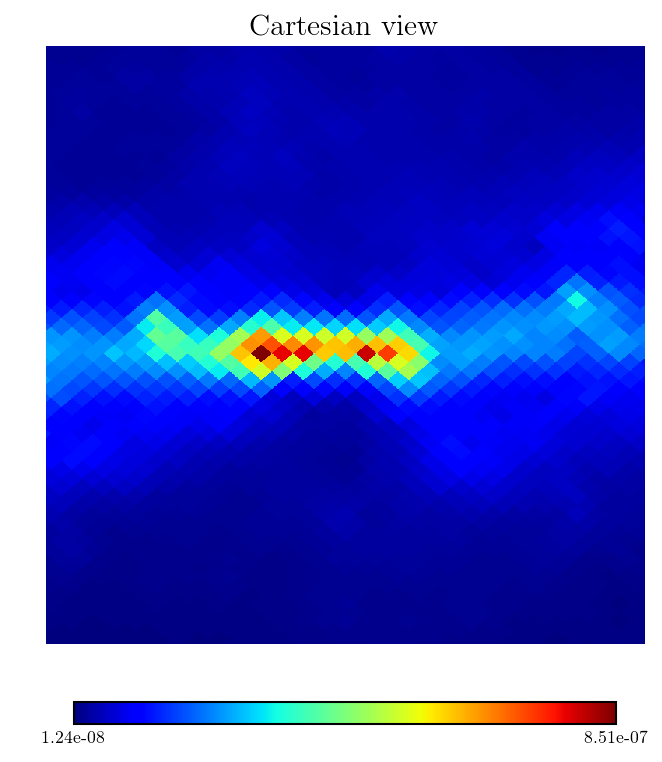

In [41]:
import h5py, healpy
f2 = h5py.File('./mod_e_48_XCO.hdf5','r')
d1 = f2['templates/pi0'][10]
healpy.cartview(d1, latra=(-5,5), lonra=(-5,5))

import h5py, healpy
f2 = h5py.File('./mod_e_0_XCO.hdf5','r')
d1 = f2['templates/pi0'][10]
healpy.cartview(d1, latra=(-5,5), lonra=(-5,5))





Filename: ../fermitools/ScienceTools-v9r33p0-fssc-20140520-x86_64-unknown-linux-gnu-libc2.15-0/x86_64-unknown-linux-gnu-libc2.15-0/refdata/fermi/galdiffuse/gll_iem_v05_rev1.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      35   (2880, 1441, 30)   float32   
1    ENERGIES    BinTableHDU     11   30R x 1C     [D]   


<matplotlib.colorbar.Colorbar instance at 0x7fb704c90b00>

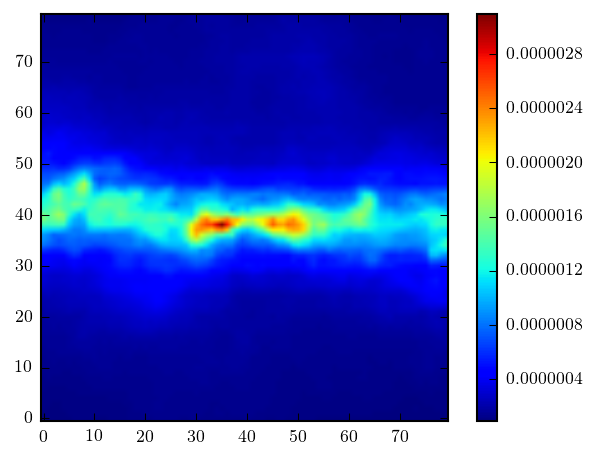

In [31]:
h = pyfits.open('../fermitools/ScienceTools-v9r33p0-fssc-20140520-x86_64-unknown-linux-gnu-libc2.15-0/x86_64-unknown-linux-gnu-libc2.15-0/refdata/fermi/galdiffuse/gll_iem_v05_rev1.fit')
h.info()
plt.imshow(h[0].data[6,721-40:721+40,1441-40:1441+40], origin='lower')
plt.colorbar()